## Use Random Forest to prepare a model on fraud data 
    treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd

In [3]:
income_data = pd.read_csv('Fraud_check.csv')
income_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Initial Analysis

In [4]:
income_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
income_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## Data Preparation

### treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [8]:
income_data['Tax_Conc'] = income_data['Taxable.Income'].apply(lambda x: 'Risky' if x<=30000 else 'Good')
income_data.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Conc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [10]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column_name in income_data.columns:
    if income_data[column_name].dtypes == object:
        income_data[column_name] = le.fit_transform(income_data[column_name])
    else:
        pass
income_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Conc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [13]:
# Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x
scale_income_data = norm_func(income_data.iloc[:,0:])
scale_income_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Conc
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,0.0
...,...,...,...,...,...,...,...
595,1.0,0.0,0.740236,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.669122,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.416566,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.988540,0.886810,0.566667,0.0,0.0


In [15]:
x = scale_income_data.drop(labels='Tax_Conc', axis=1,)
y = scale_income_data[['Tax_Conc']]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=12,)

## Model Building | Model Training

In [23]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_model = rf.fit(x_train,y_train)
rf_model

RandomForestClassifier()

In [43]:
# Model Testing
y_pred_train_1 = rf_model.predict(x_train)
y_pred_test_1  = rf_model.predict(x_test)

In [48]:
# Model Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
print('Accuracy Score of Train Data   : ',accuracy_score(y_train,y_pred_train_1))
print('Precision Score of Train Data  : ',precision_score(y_train,y_pred_train_1))
print('Recall Score of Train Data     : ',recall_score(y_train,y_pred_train_1))
print('Confusion matrix of Train Data :\n ',confusion_matrix(y_train,y_pred_train_1))
print('\n')
print('Accuracy Score of Test Data  : ',accuracy_score(y_test,y_pred_test_1))
print('Precision Score of Train Data  : ',precision_score(y_test,y_pred_test_1))
print('Recall Score of Train Data     : ',recall_score(y_test,y_pred_test_1))
print('Confusion matrix of Train Data :\n ',confusion_matrix(y_test,y_pred_test_1))

Accuracy Score of Train Data   :  1.0
Precision Score of Train Data  :  1.0
Recall Score of Train Data     :  1.0
Confusion matrix of Train Data :
  [[369   0]
 [  0 111]]


Accuracy Score of Test Data  :  1.0
Precision Score of Train Data  :  1.0
Recall Score of Train Data     :  1.0
Confusion matrix of Train Data :
  [[107   0]
 [  0  13]]


## Bagging Technique using gini criteria

In [63]:
rf_2 = RandomForestClassifier(n_estimators=100,oob_score = True, criterion='gini', max_depth=4)
rf_model_1 = rf_2.fit(x_train,y_train)
rf_model_1

RandomForestClassifier(max_depth=4, oob_score=True)

In [64]:
# Model Testing
y_pred_train_2 = rf_model_1.predict(x_train) 
y_pred_test_2  = rf_model_1.predict(x_test)

In [65]:
# Model Evaluation
print('Accuracy Score of Train Data   : ',accuracy_score(y_train,y_pred_train_2))
print('Precision Score of Train Data  : ',precision_score(y_train,y_pred_train_2))
print('Recall Score of Train Data     : ',recall_score(y_train,y_pred_train_2))
print('Confusion matrix of Train Data :\n ',confusion_matrix(y_train,y_pred_train_2))
print('\n')
print('Accuracy Score of Test Data  : ',accuracy_score(y_test,y_pred_test_2))
print('Precision Score of Train Data  : ',precision_score(y_test,y_pred_test_2))
print('Recall Score of Train Data     : ',recall_score(y_test,y_pred_test_2))
print('Confusion matrix of Train Data :\n ',confusion_matrix(y_test,y_pred_test_2))

Accuracy Score of Train Data   :  1.0
Precision Score of Train Data  :  1.0
Recall Score of Train Data     :  1.0
Confusion matrix of Train Data :
  [[369   0]
 [  0 111]]


Accuracy Score of Test Data  :  1.0
Precision Score of Train Data  :  1.0
Recall Score of Train Data     :  1.0
Confusion matrix of Train Data :
  [[107   0]
 [  0  13]]


In [66]:
rf_model_1.oob_score_

0.9979166666666667

## Bagging technique using Entropy Criteria

In [59]:
rf_3 = RandomForestClassifier(n_jobs = 3,n_estimators = 100, oob_score = True, criterion = "entropy")
rf_model_2 = rf_3.fit(x_train,y_train)
rf_model_2

RandomForestClassifier(criterion='entropy', n_jobs=3, oob_score=True)

In [60]:
# Model Testing
y_pred_train_3 = rf_model_2.predict(x_train) 
y_pred_test_3  = rf_model_2.predict(x_test)

In [61]:
# Model Evaluation
print('Accuracy Score of Train Data   : ',accuracy_score(y_train,y_pred_train_3))
print('Precision Score of Train Data  : ',precision_score(y_train,y_pred_train_3))
print('Recall Score of Train Data     : ',recall_score(y_train,y_pred_train_3))
print('Confusion matrix of Train Data :\n ',confusion_matrix(y_train,y_pred_train_3))
print('\n')
print('Accuracy Score of Test Data  : ',accuracy_score(y_test,y_pred_test_3))
print('Precision Score of Train Data  : ',precision_score(y_test,y_pred_test_3))
print('Recall Score of Train Data     : ',recall_score(y_test,y_pred_test_3))
print('Confusion matrix of Train Data :\n ',confusion_matrix(y_test,y_pred_test_3))

Accuracy Score of Train Data   :  1.0
Precision Score of Train Data  :  1.0
Recall Score of Train Data     :  1.0
Confusion matrix of Train Data :
  [[369   0]
 [  0 111]]


Accuracy Score of Test Data  :  1.0
Precision Score of Train Data  :  1.0
Recall Score of Train Data     :  1.0
Confusion matrix of Train Data :
  [[107   0]
 [  0  13]]


In [62]:
rf_model_2.oob_score_

0.9979166666666667

## ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Random Forest
 
    Assignment


    About the data: 
    Let’s consider a Company dataset with around 10 variables and 400 records. 
    The attributes are as follows: 
     Sales -- Unit sales (in thousands) at each location
     Competitor Price -- Price charged by competitor at each location
     Income -- Community income level (in thousands of dollars)
     Advertising -- Local advertising budget for company at each location (in thousands of dollars)
     Population -- Population size in region (in thousands)
     Price -- Price company charges for car seats at each site
     Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the     car seats at each site
     Age -- Average age of the local population
     Education -- Education level at each location
        Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
     US -- A factor with levels No and Yes to indicate whether the store is in the US or not
    The company dataset looks like this: 
 
    Problem Statement:
    A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
    Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all     other variable will be independent in the analysis.  


In [68]:
sales_data = pd.read_csv('Company_Data.csv')
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Initial Analysis

In [69]:
sales_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [70]:
sales_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [71]:
sales_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


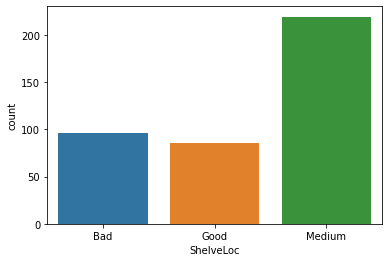

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [72]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(sales_data['ShelveLoc'])
plt.show()
print(sales_data['ShelveLoc'].value_counts())

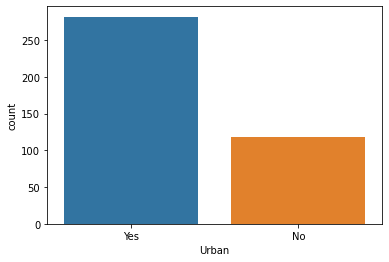

Yes    282
No     118
Name: Urban, dtype: int64


In [73]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(sales_data['Urban'])
plt.show()
print(sales_data['Urban'].value_counts())

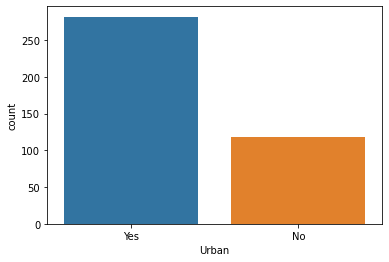

Yes    282
No     118
Name: Urban, dtype: int64


In [74]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(sales_data['Urban'])
plt.show()
print(sales_data['Urban'].value_counts())

## Data Preparation

### First convert target data(Sales) into categorical variable.

In [75]:
sales_data['Sales']       = pd.cut(x=sales_data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High']) 

sales_data['CompPrice']   = pd.cut(x=sales_data['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'])

sales_data['Income']      = pd.cut(x=sales_data['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'])

sales_data['Advertising'] = pd.cut(x=sales_data['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'])

sales_data['Population']  = pd.cut(x=sales_data['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'])

sales_data['Price']       = pd.cut(x=sales_data['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'])

sales_data['Age']         = pd.cut(x=sales_data['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'])

sales_data['Education']   = pd.cut(x=sales_data['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'])
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,NaN,Yes,Yes
2,Medium,Medium,Low,Low,Medium,Low,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,Medium,Medium,Bad,Low,Medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,Low,High,Yes,Yes
398,Low,Low,High,Low,Medium,Medium,Bad,Medium,Low,Yes,Yes


In [76]:
sales_data.dtypes

Sales          category
CompPrice      category
Income         category
Advertising    category
Population     category
Price          category
ShelveLoc        object
Age            category
Education      category
Urban            object
US               object
dtype: object

In [77]:
#Label Encoding
sales_data['Sales']=le.fit_transform(sales_data['Sales'])
sales_data['CompPrice']=le.fit_transform(sales_data['CompPrice'])
sales_data['Income']=le.fit_transform(sales_data['Income'])
sales_data['Advertising']=le.fit_transform(sales_data['Advertising'])
sales_data['Population']=le.fit_transform(sales_data['Population'])
sales_data['Price']=le.fit_transform(sales_data['Price'])
sales_data['ShelveLoc']=le.fit_transform(sales_data['ShelveLoc'])
sales_data['Age']=le.fit_transform(sales_data['Age'])
sales_data['Education']=le.fit_transform(sales_data['Education'])
sales_data['Urban']=le.fit_transform(sales_data['Urban'])
sales_data['US']=le.fit_transform(sales_data['US'])
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,3,1,1
2,2,2,1,1,2,1,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,2,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,1,0,1,2,2,0,2,1,1,1


In [78]:
x = sales_data.drop('Sales',axis=1)
y = sales_data[['Sales']]

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12,)

## Model Building | Model Traning

In [146]:
from sklearn.ensemble import RandomForestClassifier
re=RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=12,)
model = re.fit(x_train,y_train)
model

RandomForestClassifier(n_jobs=2, random_state=12)

In [147]:
# Model Testing
y_pred_train = model.predict(x_train)
y_pred_test  = model.predict(x_test)

In [148]:
# Model Evaluation
print('Accuracy Score of Train Data   : ',accuracy_score(y_train,y_pred_train))
print('Accuracy Score of Test Data  : ',accuracy_score(y_test,y_pred_test))

Accuracy Score of Train Data   :  0.99375
Accuracy Score of Test Data  :  0.725


## Model Building using gini criteria

In [149]:
re_gini = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5,n_jobs=2, random_state=12)
re_model_gini = re_gini.fit(x_train,y_train)
re_model_gini

RandomForestClassifier(max_depth=5, n_jobs=2, random_state=12)

In [150]:
# Model Testing
y_pred_gini_train = re_model_gini.predict(x_train)
y_pred_gini_test  = re_model_gini.predict(x_test)

In [151]:
# Model Evaluation
print('Accuracy Score of Train Data   : ',accuracy_score(y_train,y_pred_gini_train))
print('Accuracy Score of Test Data  : ',accuracy_score(y_test,y_pred_gini_test))

Accuracy Score of Train Data   :  0.775
Accuracy Score of Test Data  :  0.75


## Model Building using gini criteria

In [167]:
re_entro = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5,n_jobs=2, random_state=12)
re_model_entro = re_entro.fit(x_train,y_train)
re_model_entro

RandomForestClassifier(criterion='entropy', max_depth=5, n_jobs=2,
                       random_state=12)

In [168]:
# Model Testing
y_pred_entro_train = re_model_entro.predict(x_train)
y_pred_entro_test  = re_model_entro.predict(x_test)

In [169]:
# Model Evaluation
print('Accuracy Score of Train Data   : ',accuracy_score(y_train,y_pred_entro_train))
print('Accuracy Score of Test Data  : ',accuracy_score(y_test,y_pred_entro_test))

Accuracy Score of Train Data   :  0.771875
Accuracy Score of Test Data  :  0.7625
